In [ ]:

import numpy as np
import pandas as pd
from datetime import datetime
import statistics 
import seaborn as sns
from pandas_datareader import data
from pulp import *
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
assets = yf.Tickers (['PFE', 'JNJ', 'BMY', 'MRK', 'ABBV', 'LLY', 'NVS', 'NVO', 'GSK', 'ZTS', 'TAK', 'SNY', 'AZN', 'REGN', 'MRNA', 'VRTX', 'ALNY', 'BNTX', 'GMAB', 'BMRN', 'GILD', 'HZNP', 'BGNE', 'AMGN', 'BIIB', 'SGEN', 'ARGX', 'BAYRY', 'RHHBY', 'HLN', 'ELAN', 'CTLT', 'TEVA', 'PRGO', 'RDY', 'ABT', 'LCI', 'ITCI', 'PBH', 'EBS', 'ATNM', 'OGN', 'CANF', 'IBIO', 'CPHI', 'CRMD', 'NNVC', 'BHVN', 'AMPE', 'OGEN', 'PTN', "^IXIC"])
startDate = '2018-01-01'
today = datetime.today().strftime("%Y-%m-%d")

In [ ]:
data = assets.history(start = startDate, end = today)[["Close"]]
data.tail()

[*********************100%***********************]  52 of 52 completed


Close                                                        \
                  ABBV         ABT        ALNY        AMGN  AMPE        ARGX   
Date                                                                           
2023-03-30  157.919998   99.080002  195.119995  241.500000  0.24  369.829987   
2023-03-31  159.369995  101.260002  200.320007  241.750000  0.23  372.579987   
2023-04-03  160.419998  101.589996  200.699997  244.440002  0.22  360.140015   
2023-04-04  159.779999  102.800003  202.699997  247.529999  0.22  367.470001   
2023-04-05  160.800003  104.209999  200.820007  253.369995  0.22  373.179993   

                                                ...                         \
            ATNM        AZN  BAYRY        BGNE  ...        RDY        REGN   
Date                                            ...                          
2023-03-30  9.15  69.199997  15.86  218.199997  ...  56.310001  811.500000   
2023-03-31  9.45  69.410004  15.93  215.529999  ...  56.930000  821.669983   
2023-04-03  9.20  69.910004  16.17  212.880005  ...  57.340000  826.190002   
2023-04-04  8.96  70.250000  16.09  215.000000  ...  57.480000  822.090027   
2023-04-05  8.71  72.050003  16.26  212.000000  ...  57.950001  825.219971   

                                                                           \
                RHHBY        SGEN        SNY        TAK  TEVA        VRTX   
Date                                                                        
2023-03-30  35.799999  203.080002  53.970001  16.350000  8.82  312.160004   
2023-03-31  35.860001  202.470001  54.419998  16.480000  8.85  315.070007   
2023-04-03  35.820000  202.000000  54.180000  16.520000  9.12  316.329987   
2023-04-04  36.110001  204.889999  54.209999  16.670000  9.10  314.420013   
2023-04-05  37.160000  205.000000  54.840000  16.540001  9.20  321.940002   

                                      
                   ZTS         ^IXIC  
Date                                  
2023-03-30  164.149994  12013.469727  
2023-03-31  166.440002  12221.910156  
2023-04-03  167.660004  12189.450195  
2023-04-04  167.070007  12126.330078  
2023-04-05  167.649994  11996.860352  

[5 rows x 52 columns]

In [ ]:
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Export to Excel
data.to_excel("data.xlsx")


In [ ]:
df = pd.read_excel("data1.xlsx")
df

,Date,Close_ABBV,Close_ABT,Close_ALNY,Close_AMGN,Close_ARGX,Close_AZN,Close_BAYRY,Close_BGNE,Close_BIIB,...,Close_PRGO,Close_RDY,Close_REGN,Close_RHHBY,Close_SGEN,Close_SNY,Close_TAK,Close_VRTX,Close_ZTS,Close_^IXIC
0,2018-01-02,77.285172,53.904884,131.850006,151.353912,63.750000,29.981085,25.392031,100.809998,334.170013,...,80.796936,36.537289,382.600006,26.159948,56.130001,35.385727,28.559999,152.910004,69.429108,7006.899902
1,2018-01-03,78.494583,54.024090,134.649994,154.209961,62.430000,30.040401,25.294214,102.370003,339.850006,...,80.571739,35.875423,393.779999,26.497658,56.610001,35.287704,28.910000,152.009995,69.748375,7065.529785
2,2018-01-04,78.046959,53.932396,131.960007,153.560104,59.790001,30.082775,25.726242,100.389999,339.989990,...,82.049118,36.422184,382.950012,26.645918,55.529999,35.859505,29.010000,153.070007,70.164345,7077.910156
3,2018-01-05,79.405586,54.088280,127.730003,154.475067,56.950001,30.396309,26.688128,98.519997,342.489990,...,82.139191,37.151203,385.100006,26.670630,55.009998,36.488461,29.160000,155.690002,70.967270,7136.560059
4,2018-01-08,78.133354,53.932396,129.179993,154.432312,58.110001,30.184464,26.492489,97.410004,329.649994,...,81.193306,36.911396,372.519989,26.390579,54.680000,36.431286,29.299999,156.889999,71.818581,7157.390137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,2023-03-30,157.919998,99.080002,195.119995,241.500000,369.829987,69.199997,15.860000,218.199997,275.130005,...,35.400002,56.310001,811.500000,35.799999,203.080002,53.970001,16.350000,312.160004,164.149994,12013.469727
1320,2023-03-31,159.369995,101.260002,200.320007,241.750000,372.579987,69.410004,15.930000,215.529999,278.029999,...,35.869999,56.930000,821.669983,35.860001,202.470001,54.419998,16.480000,315.070007,166.440002,12221.910156
1321,2023-04-03,160.419998,101.589996,200.699997,244.440002,360.140015,69.910004,16.170000,212.880005,277.339996,...,35.840000,57.340000,826.190002,35.820000,202.000000,54.180000,16.520000,316.329987,167.660004,12189.450195
1322,2023-04-04,159.779999,102.800003,202.699997,247.529999,367.470001,70.250000,16.090000,215.000000,275.250000,...,35.849998,57.480000,822.090027,36.110001,204.889999,54.209999,16.670000,314.420013,167.070007,12126.330078


In [ ]:
df.drop(["Close_^IXIC"], axis = 1, inplace = True)


In [ ]:
df

,Close_ABBV,Close_ABT,Close_ALNY,Close_AMGN,Close_ARGX,Close_AZN,Close_BAYRY,Close_BGNE,Close_BIIB,Close_BMRN,...,Close_PFE,Close_PRGO,Close_RDY,Close_REGN,Close_RHHBY,Close_SGEN,Close_SNY,Close_TAK,Close_VRTX,Close_ZTS
0,77.285172,53.904884,131.850006,151.353912,63.750000,29.981085,25.392031,100.809998,334.170013,91.029999,...,28.559780,80.796936,36.537289,382.600006,26.159948,56.130001,35.385727,28.559999,152.910004,69.429108
1,78.494583,54.024090,134.649994,154.209961,62.430000,30.040401,25.294214,102.370003,339.850006,92.080002,...,28.771389,80.571739,35.875423,393.779999,26.497658,56.610001,35.287704,28.910000,152.009995,69.748375
2,78.046959,53.932396,131.960007,153.560104,59.790001,30.082775,25.726242,100.389999,339.989990,90.320000,...,28.834093,82.049118,36.422184,382.950012,26.645918,55.529999,35.859505,29.010000,153.070007,70.164345
3,79.405586,54.088280,127.730003,154.475067,56.950001,30.396309,26.688128,98.519997,342.489990,90.269997,...,28.888960,82.139191,37.151203,385.100006,26.670630,55.009998,36.488461,29.160000,155.690002,70.967270
4,78.133354,53.932396,129.179993,154.432312,58.110001,30.184464,26.492489,97.410004,329.649994,88.639999,...,28.567623,81.193306,36.911396,372.519989,26.390579,54.680000,36.431286,29.299999,156.889999,71.818581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,157.919998,99.080002,195.119995,241.500000,369.829987,69.199997,15.860000,218.199997,275.130005,95.290001,...,40.380001,35.400002,56.310001,811.500000,35.799999,203.080002,53.970001,16.350000,312.160004,164.149994
1320,159.369995,101.260002,200.320007,241.750000,372.579987,69.410004,15.930000,215.529999,278.029999,97.239998,...,40.799999,35.869999,56.930000,821.669983,35.860001,202.470001,54.419998,16.480000,315.070007,166.440002
1321,160.419998,101.589996,200.699997,244.440002,360.140015,69.910004,16.170000,212.880005,277.339996,96.599998,...,41.349998,35.840000,57.340000,826.190002,35.820000,202.000000,54.180000,16.520000,316.329987,167.660004
1322,159.779999,102.800003,202.699997,247.529999,367.470001,70.250000,16.090000,215.000000,275.250000,95.430000,...,40.900002,35.849998,57.480000,822.090027,36.110001,204.889999,54.209999,16.670000,314.420013,167.070007


In [ ]:
# calculate the annual mean returns and variances 

daily_returns = df.pct_change()
annual_mean_returns = daily_returns.mean()*252
annual_returns_variance = daily_returns.var() *252


In [ ]:
# Create a new data frame 
df2 = pd.DataFrame(df.columns, columns = ["Stock_symbols"])
df2["Variance"] = annual_returns_variance.values
df2["Log_Returns"] = annual_mean_returns.values
df2

,Stock_symbols,Variance,Log_Returns
0,Close_ABBV,0.079519,0.179786
1,Close_ABT,0.070236,0.160709
2,Close_ALNY,0.255573,0.202860
3,Close_AMGN,0.065574,0.130780
4,Close_ARGX,0.210311,0.438985
5,Close_AZN,0.066558,0.200326
6,Close_BAYRY,0.109410,-0.029834
7,Close_BGNE,0.369688,0.322634
8,Close_BIIB,0.252913,0.087716
9,Close_BMRN,0.144847,0.087432


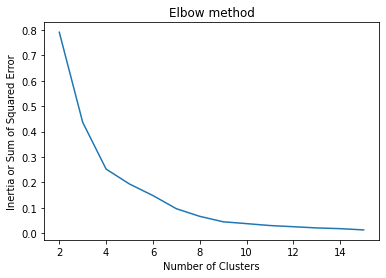

In [ ]:
# Use the elbow method to determine the number of groups of stocks to use 
# Get and store the annual returns and annual variances 

X = df2[["Log_Returns", "Variance"]].values

inertia_list = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
# Plot the data 

plt.plot(range(2,16), inertia_list)
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel ("Inertia or Sum of Squared Error")
plt.show()

In [ ]:
# Show the labels and groups for each stock in the dataset 

kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_
labels

array([2, 2, 0, 2, 0, 2, 3, 0, 3, 2, 2, 2, 3, 2, 2, 2, 0, 1, 2, 0, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 0, 2, 3, 2, 2], dtype=int32)

In [ ]:
df2["Cluster_labels"] = labels
df2

,Stock_symbols,Variance,Log_Returns,Cluster_labels
0,Close_ABBV,0.079519,0.179786,2
1,Close_ABT,0.070236,0.160709,2
2,Close_ALNY,0.255573,0.202860,0
3,Close_AMGN,0.065574,0.130780,2
4,Close_ARGX,0.210311,0.438985,0
5,Close_AZN,0.066558,0.200326,2
6,Close_BAYRY,0.109410,-0.029834,3
7,Close_BGNE,0.369688,0.322634,0
8,Close_BIIB,0.252913,0.087716,3
9,Close_BMRN,0.144847,0.087432,2


<function matplotlib.pyplot.show(close=None, block=None)>

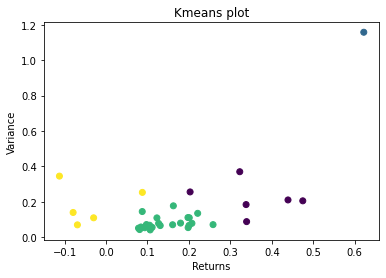

In [ ]:
# Plot and show the various clusters 

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap = "viridis" )
plt.title ("Kmeans plot")
plt.xlabel("Returns")
plt.ylabel("Variance")
plt.show

In [ ]:
# create a function for a simple divrsed portfolio
def diversed_port():
    for i in range (0, 4):
        symbol = df2 [ df2["Cluster_labels"]==i].head()
        print(symbol[["Stock_symbols", "Cluster_labels"]])
    

In [ ]:
diversed_port()

   Stock_symbols  Cluster_labels
2     Close_ALNY               0
4     Close_ARGX               0
7     Close_BGNE               0
16    Close_HZNP               0
19     Close_LLY               0
   Stock_symbols  Cluster_labels
17    Close_ITCI               1
  Stock_symbols  Cluster_labels
0    Close_ABBV               2
1     Close_ABT               2
3    Close_AMGN               2
5     Close_AZN               2
9    Close_BMRN               2
   Stock_symbols  Cluster_labels
6    Close_BAYRY               3
8     Close_BIIB               3
12     Close_EBS               3
25    Close_PRGO               3
31     Close_TAK               3


In [ ]:
# We did not remove any outliers and did not implement any technical analysis. We simply implemented a hueristic to determine the number of groups and not the optimum clusters.

Number of clusters: 1


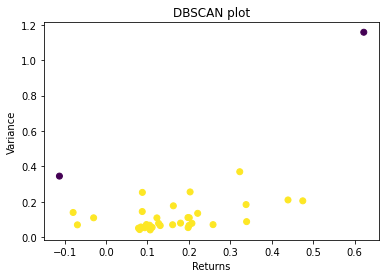

Outliers:
   Stock_symbols
12     Close_EBS
17    Close_ITCI
Cluster 0:
  Stock_symbols  Log_Returns  Variance
0    Close_ABBV     0.179786  0.079519
1     Close_ABT     0.160709  0.070236
2    Close_ALNY     0.202860  0.255573
3    Close_AMGN     0.130780  0.065574
4    Close_ARGX     0.438985  0.210311


In [ ]:
X = df2[["Log_Returns", "Variance"]].values

# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.title("DBSCAN plot")
plt.xlabel("Returns")
plt.ylabel("Variance")
plt.show()

# create a function for a simple diversified portfolio
def diversified_port():
    for i in range(-1, n_clusters):
        if i == -1:
            # outliers, if any
            symbol = df2[labels == i].head()
            print(f"Outliers:\n{symbol[['Stock_symbols']]}")
        else:
            symbol = df2[labels == i].head()
            print(f"Cluster {i}:\n{symbol[['Stock_symbols', 'Log_Returns', 'Variance']]}")

diversified_port()


In [ ]:
# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical.fit(X)
labels = hierarchical.labels_

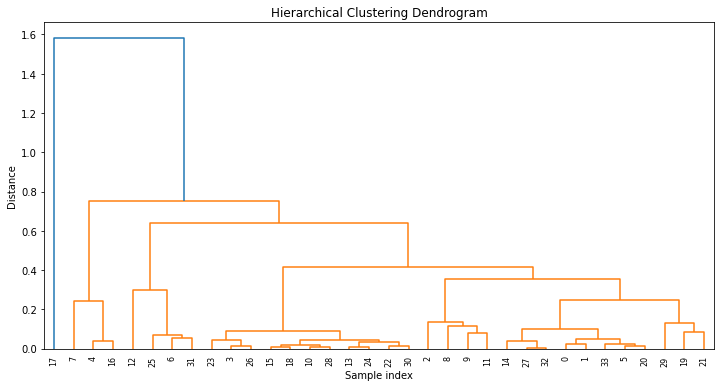

In [ ]:
# Perform hierarchical clustering using Ward's method
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()



In [ ]:
# K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)
kmeans_davies_bouldin_score = davies_bouldin_score(X, kmeans.labels_)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
dbscan_silhouette_score = silhouette_score(X, dbscan.labels_)
dbscan_davies_bouldin_score = davies_bouldin_score(X, dbscan.labels_)

# Hierarchical
hierarchical_silhouette_score = silhouette_score(X, hierarchical.labels_)
hierarchical_davies_bouldin_score = davies_bouldin_score(X, hierarchical.labels_)

print(f"K-Means silhouette score: {kmeans_silhouette_score}")
print(f"K-Means Davies-Bouldin score: {kmeans_davies_bouldin_score}")
print(f"DBSCAN silhouette score: {dbscan_silhouette_score}")
print(f"DBSCAN Davies-Bouldin score: {dbscan_davies_bouldin_score}")
print(f"Hierarchical silhouette score: {hierarchical_silhouette_score}")
print(f"Hierarchical Davies-Bouldin score: {hierarchical_davies_bouldin_score}")



K-Means silhouette score: 0.4882614388947565
K-Means Davies-Bouldin score: 0.6100818680615292
DBSCAN silhouette score: 0.7069681295763273
DBSCAN Davies-Bouldin score: 1.0363458845391889
Hierarchical silhouette score: 0.4726932370569456
Hierarchical Davies-Bouldin score: 0.5327393824128435
